<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/2_ML26_K_%C5%9Brednich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import random
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(42)
np.set_printoptions(precision=6)
random.seed(41)

#Generowanie zmiennych

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=40, centers=2, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,0.377430,0.069424
1,2.217347,2.327304
2,1.376777,0.603609
3,-1.467097,3.139985
4,-1.605386,5.457993


#Wizualizacja danych

In [3]:
fig = px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich')
fig.update_traces(marker_size=12)

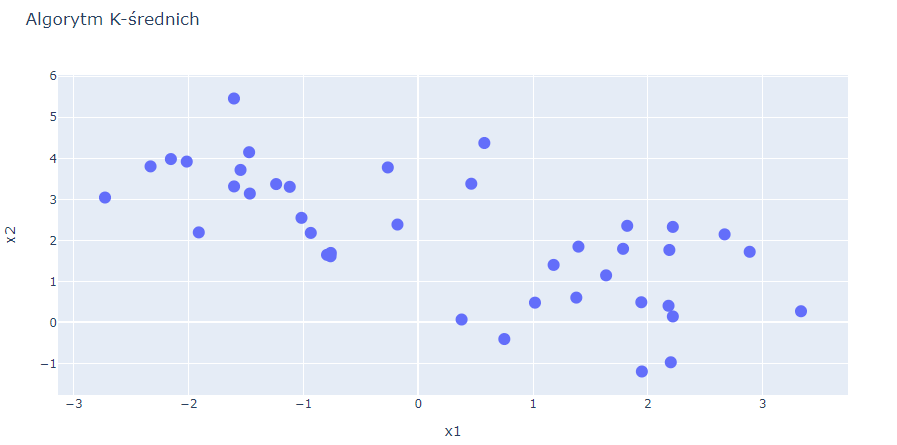

#Implementacja algorytmu K-średnich

##Wyznaczenie wartości brzegowych

In [4]:
#Wyznaczenie wartości brzegowych
x1_min = df.x1.min()
x1_max = df.x1.max()
x2_min = df.x2.min()
x2_max = df.x2.max()

print(x1_min, x1_max)
print(x2_min, x2_max)

-2.728596881734133 3.333845579232757
-1.1983010410246 5.457992635788267


##Losowe wygenerowanie współrzędnych centroidów

In [5]:
centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

print(centroid_1)
print(centroid_2)

[-0.418681  0.337434]
[-1.722009  4.884443]


##Wizualizacja tzw. punktów startowych centroidów

In [6]:
fig = px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich - inicjalizacja centroidów')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12, showlegend=False)

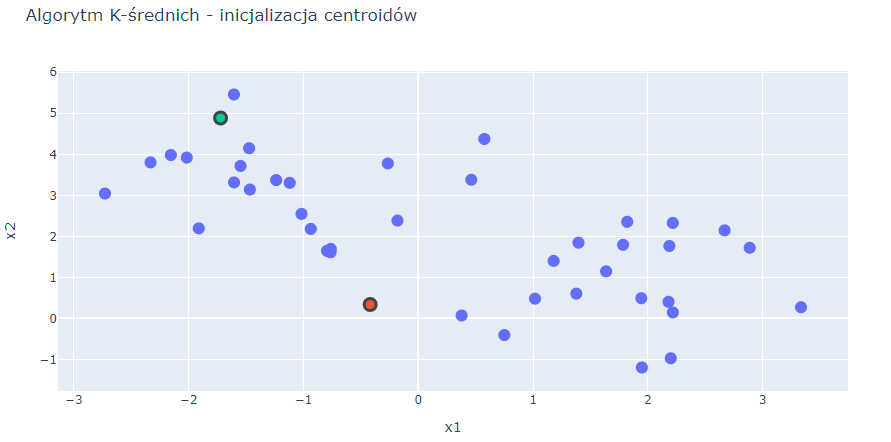

##Przypisanie punktów do najbliższego centroidu

In [7]:
clusters = []
for point in data:
  centroid_1_dist = norm(centroid_1 - point)
  centroid_2_dist = norm(centroid_2 - point)
  cluster = 1
  if centroid_1_dist > centroid_2_dist:
    cluster = 2
  clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


##Wizualizacja przypisania

In [8]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500, 
                 title='Algorytm K-średnich - iteracja 1 - przypisanie punktów do najbliższego centroidu')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

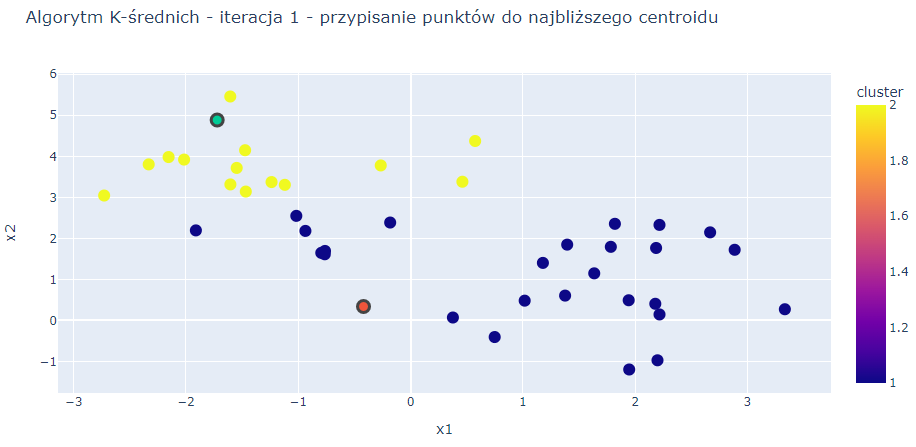

##Obliczenie współrzędnych nowych centroidów

In [9]:
new_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_centroid_1, new_centroid_2)

[1.1057883070617118, 1.1784295565923741] [-1.322466347597972, 3.7664746248027723]


##Wizualizacja nowych pozycji centroidów

In [10]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500, 
                 title='Algorytm K-średnich - obliczenie nowych centroidów')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

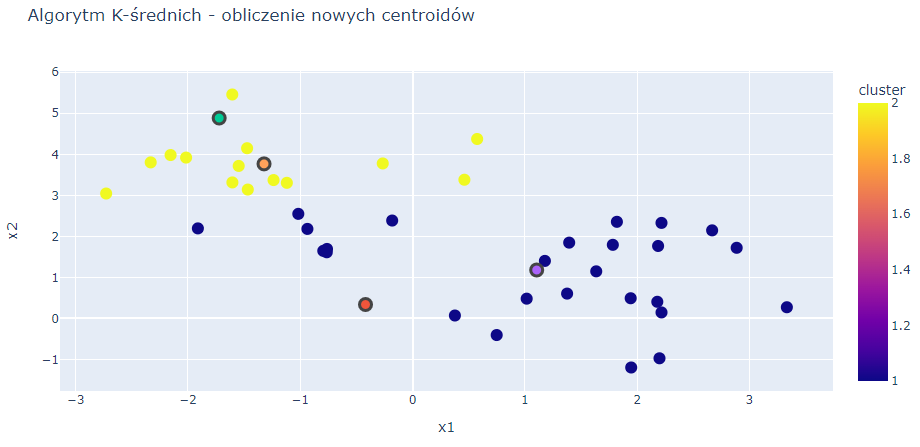

In [11]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500, 
                 title='Algorytm K-średnich - aktualizacja centroidów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

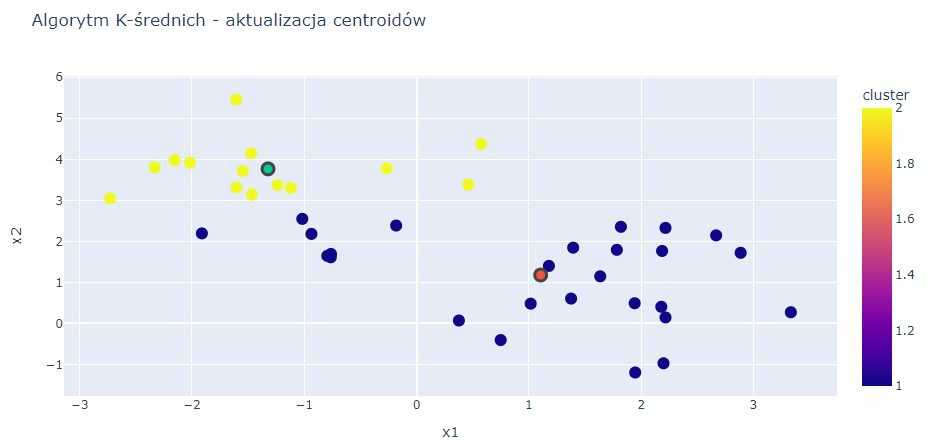

##Przypisanie punktów do nowych centroidów

In [12]:
clusters = []
for point in data:
    centroid_1_dist = norm(new_centroid_1 - point)
    centroid_2_dist = norm(new_centroid_2 - point)
    cluster = 1
    if centroid_1_dist > centroid_2_dist:
        cluster = 2
    clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [13]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500, 
                 title='Algorytm K-średnich - iteracja 2 - ponowne przypisanie punktów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

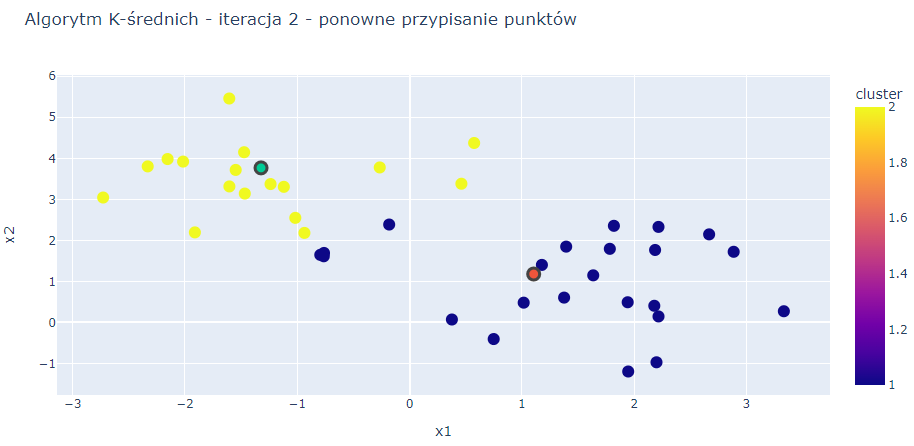

##Aktualizacja centroidów

In [14]:
new_2_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_2_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_2_centroid_1, new_2_centroid_2)

[1.4180663576886534, 1.0311646927855822] [-1.316444653506243, 3.5090014873277737]


In [15]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - ponowne obliczenie centroidów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

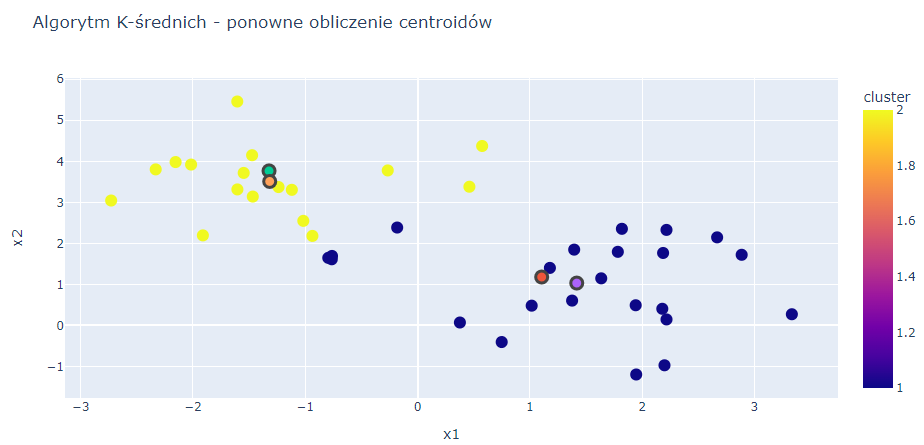

In [17]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500, 
                 title='Algorytm K-średnich - aktualzacja centroidów')
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

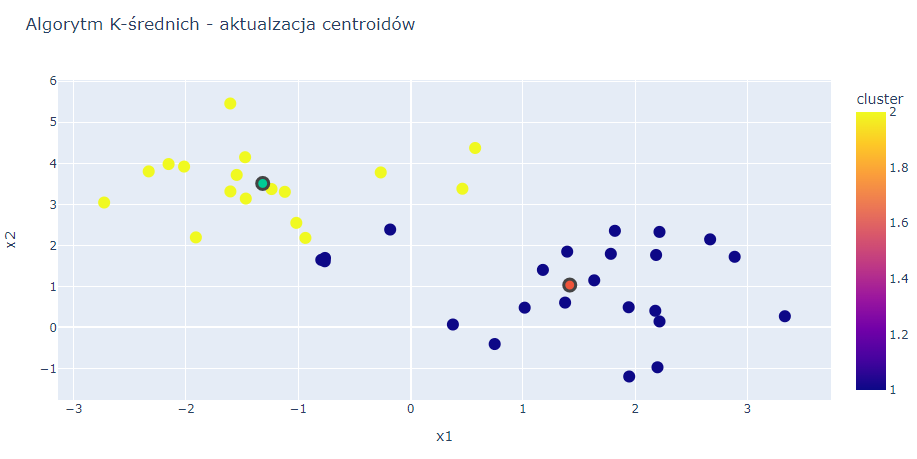

In [18]:
data = make_blobs(n_samples = 100, centers = 2, cluster_std = 1.0, center_box = (-4.0, 4.0), random_state = 42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1
        if centroid_1_dist > centroid_2_dist:
            cluster = 2
        clusters.append(cluster)

    df['cluster'] = clusters

    centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
    centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_centroid_1, new_centroid_2)

[1.1057883070617118, 1.1784295565923741] [-1.322466347597972, 3.7664746248027723]


In [19]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500, 
                 title='Algorytm K-średnich - końcowy rezultat')
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

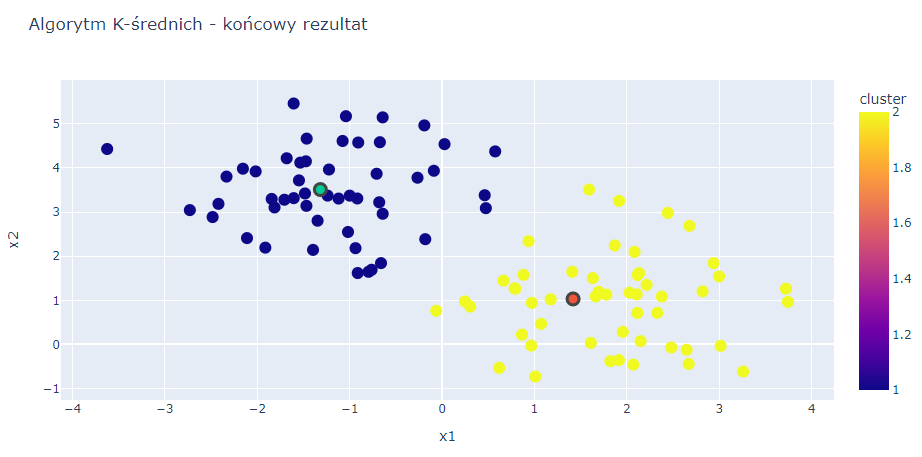